## 실루엣 분석


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 아이리스 데이터 클러스터링 평가

In [36]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [37]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [38]:
kmenas = KMeans(n_clusters=3, random_state=2021)
kmenas.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [39]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['target'] = iris.target
df['cluster'] = kmenas.labels_
df.head(3)

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [40]:
# 실루엣 계수(silhoutte)

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris_std, kmenas.labels_)
df['실루엣 계수'] = sil_samples
df.head(3)

,sl,sw,pl,pw,target,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547


In [43]:
sil_score = silhouette_score(iris_std, kmenas.labels_)

In [44]:
df['실루엣 계수'].mean()

0.45994823920518646

In [45]:
df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.347392
1    0.636316
2    0.393377
Name: 실루엣 계수, dtype: float64

- 실루엣 계수의 시각화

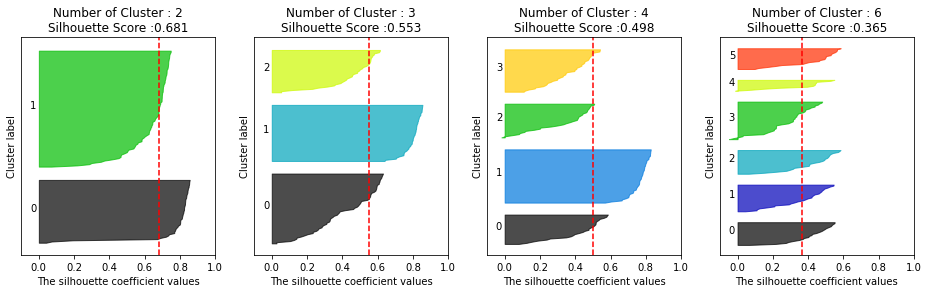

In [46]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,6], iris.data)